%%latex
\tableofcontents

# PCA analysis of chromosome bands

In [24]:
%matplotlib inline

In [25]:
from os.path import join
from pandas import read_csv, concat, cut, DataFrame, Series, qcut
import seaborn as sns
from seaborn import scatterplot
from scipy.interpolate import splrep, BSpline
from pathlib import Path
import matplotlib.pyplot as plt
from json import load

In [26]:
SAMPLES = read_csv(join("input", "samples.csv"))
LOCATIONS = read_csv(join("input", "locations.csv"))
DATASETS = read_csv(join("input", "datasets.csv"))
POPULATIONS_TO_COMPARE = SAMPLES["super-population"].unique().tolist()
MULTIINDEX = ["CHROM", "POS", "ID", "REF", "ALT"]

In [27]:
with open(join("config", "manifest.json"), 'r') as config:
    config = load(config)

path = join(*config["output"])

In [28]:
# Create a a new dictionary to store data in.
DATA = dict()


for gene in LOCATIONS["location_name"].unique().tolist():
    DATA[gene] = dict()
    DATA[gene]["eigenvectors"] = read_csv(join(
            "/",
            "mnt",
            "ICMM_HDD_12TB",
            "Results_25SEP2024",
            "pca",
            gene,
            "pca.eigenvec"), sep="\t")
    
    DATA[gene]["eigenvalues"] = read_csv(join(
            "/",
            "mnt",
            "ICMM_HDD_12TB",
            "Results_25SEP2024",
            "pca",
            gene,
            "pca.eigenval"))

In [29]:
for gene in LOCATIONS["location_name"].unique().tolist():
    DATA[gene]["eigenvectors"] = DATA[gene]["eigenvectors"].merge(SAMPLES, how="left", left_on="#IID", right_on="sample_name")

In [30]:
DATA[gene]["eigenvectors"]

#IID       PC1       PC2       PC3       PC4       PC5  \
0             HGDP00843  0.005085 -0.015295  0.017234 -0.000236  0.024467   
1             HGDP00392 -0.012224 -0.004926 -0.022012  0.029136  0.019552   
2             HGDP00544 -0.013417 -0.012408  0.018771 -0.003297 -0.002789   
3             HGDP01053 -0.026276  0.001026  0.026158  0.015740  0.030535   
4             HGDP00191  0.001446  0.005851 -0.015024  0.007552 -0.013607   
...                 ...       ...       ...       ...       ...       ...   
4052  LP6005857-DNA-G01  0.000751  0.009341  0.018274 -0.012293 -0.010908   
4053  LP6005857-DNA-G02  0.020063 -0.017223  0.005634 -0.009855 -0.031686   
4054  LP6005857-DNA-G03  0.011585  0.007339  0.008157  0.014200 -0.042939   
4055  LP6005857-DNA-H01  0.015914 -0.008833  0.014664 -0.024936  0.011176   
4056  LP6005857-DNA-H02  0.012920 -0.003372  0.012326 -0.026911 -0.017884   

           PC6       PC7       PC8       PC9      PC10        sample_name  \
0    -0.008103 -0.025166 -0.002405 -0.014071  0.008405          HGDP00843   
1    -0.010426 -0.008991 -0.007966 -0.000387 -0.005023          HGDP00392   
2     0.018748 -0.003160  0.018044 -0.012977  0.001072          HGDP00544   
3    -0.003070 -0.031386 -0.020844 -0.009393 -0.015476          HGDP01053   
4    -0.024849  0.019298  0.025342  0.017575 -0.019980          HGDP00191   
...        ...       ...       ...       ...       ...                ...   
4052  0.003026  0.016585  0.009873 -0.001377  0.003144  LP6005857-DNA-G01   
4053  0.006760  0.002893  0.003896 -0.019651 -0.040961  LP6005857-DNA-G02   
4054  0.035301  0.025375  0.015900 -0.006839  0.023005  LP6005857-DNA-G03   
4055 -0.007219  0.005564 -0.004142 -0.003479  0.034995  LP6005857-DNA-H01   
4056  0.028899  0.015339 -0.016157  0.007462 -0.031301  LP6005857-DNA-H02   

         sex dataset super-population sub-population  
0       Male    HGDP              AMR          Surui  
1       Male    HGDP              CSA        Burusho  
2     Female    HGDP              OCE         Papuan  
3     Female    HGDP              AMR           Pima  
4       Male    HGDP              CSA         Sindhi  
...      ...     ...              ...            ...  
4052    Male   SAHGP              AFR            COL  
4053    Male   SAHGP              AFR            SOT  
4054    Male   SAHGP              AFR            XHO  
4055    Male   SAHGP              AFR            COL  
4056    Male   SAHGP              AFR            SOT  

[4057 rows x 16 columns]

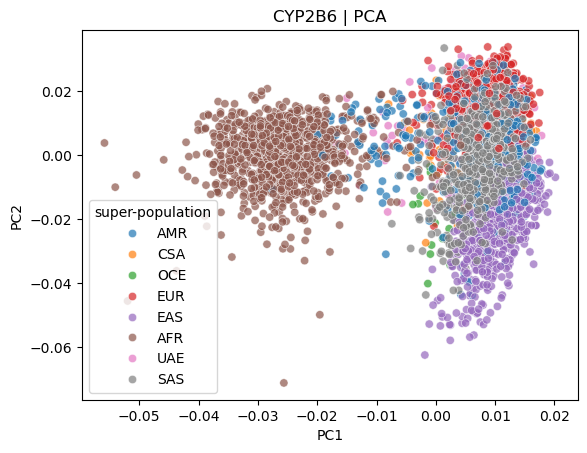

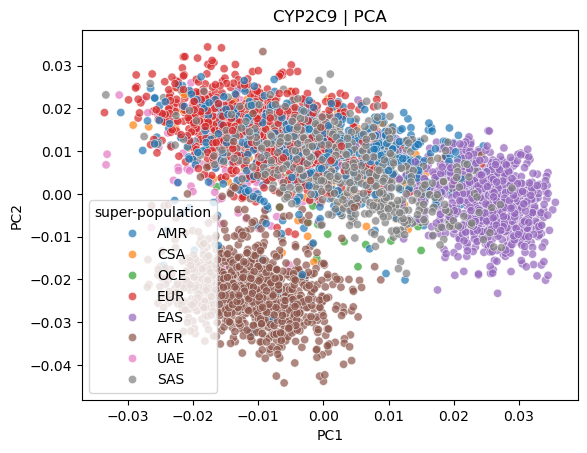

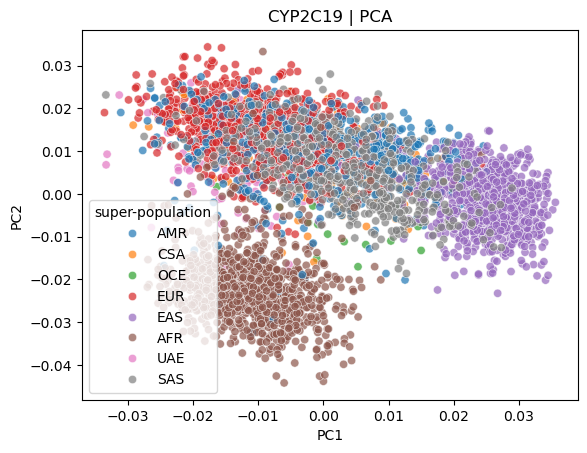

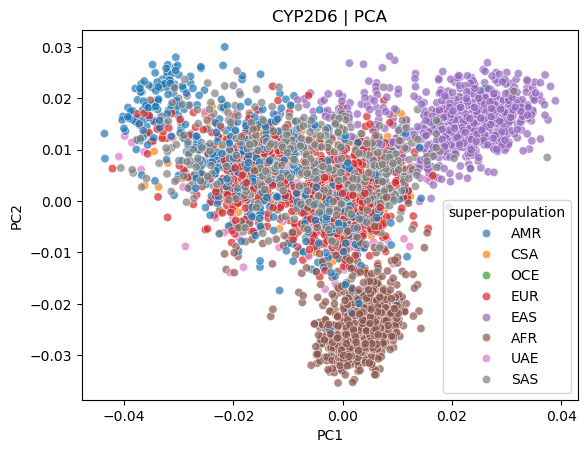

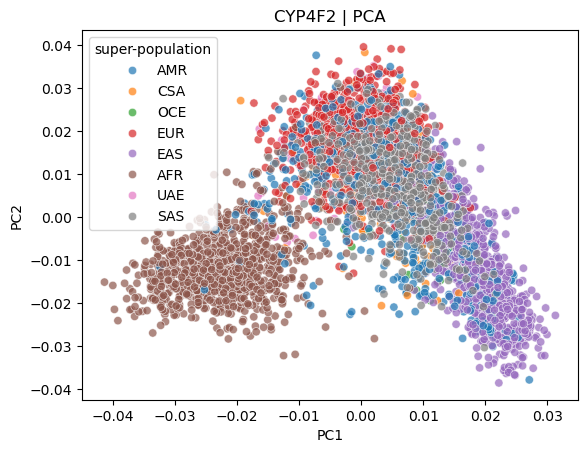

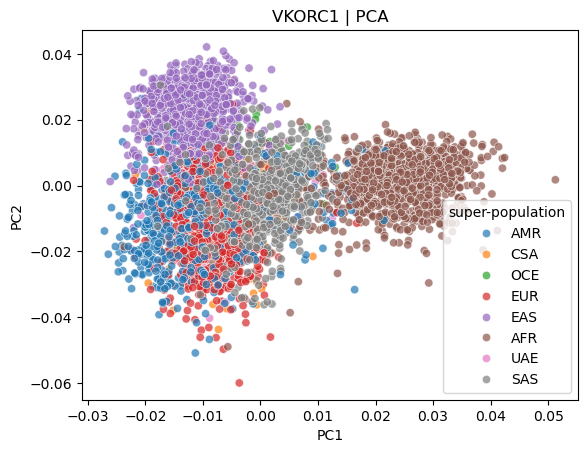

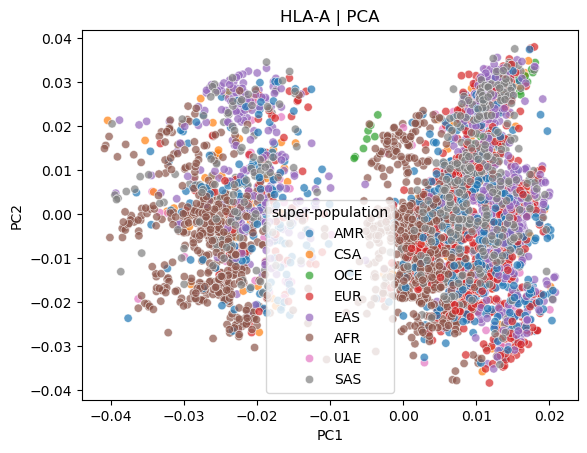

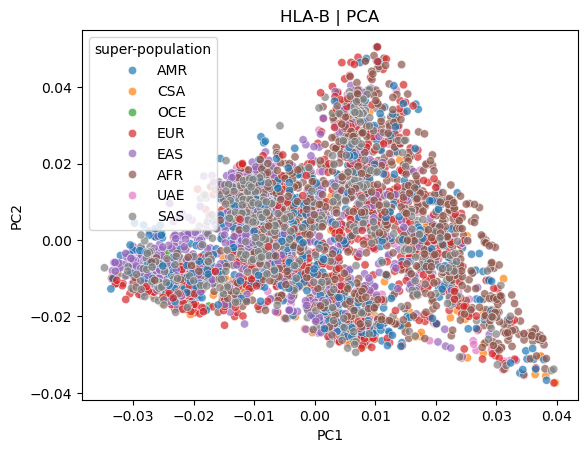

In [31]:
FIGURE = dict()

for gene in LOCATIONS["location_name"].unique().tolist():
    FIGURE[gene] = dict()
    FIGURE[gene] = scatterplot(DATA[gene]["eigenvectors"], x="PC1", y="PC2", hue="super-population", alpha=0.7, markers="sub-population")

    FIGURE[gene].set_title(f"{gene} | PCA")

    plt.show()

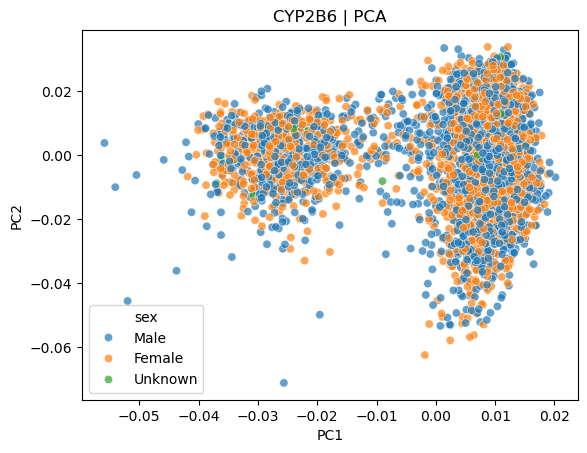

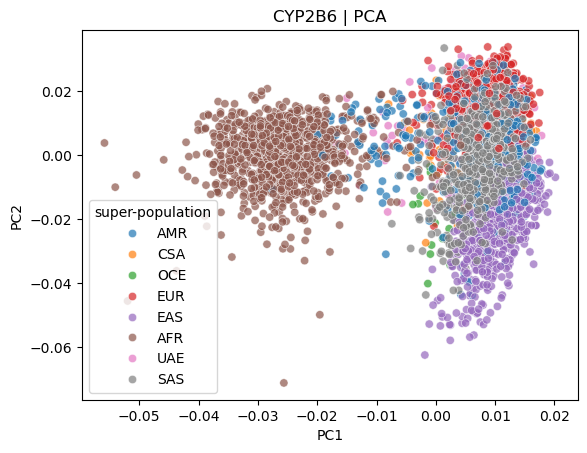

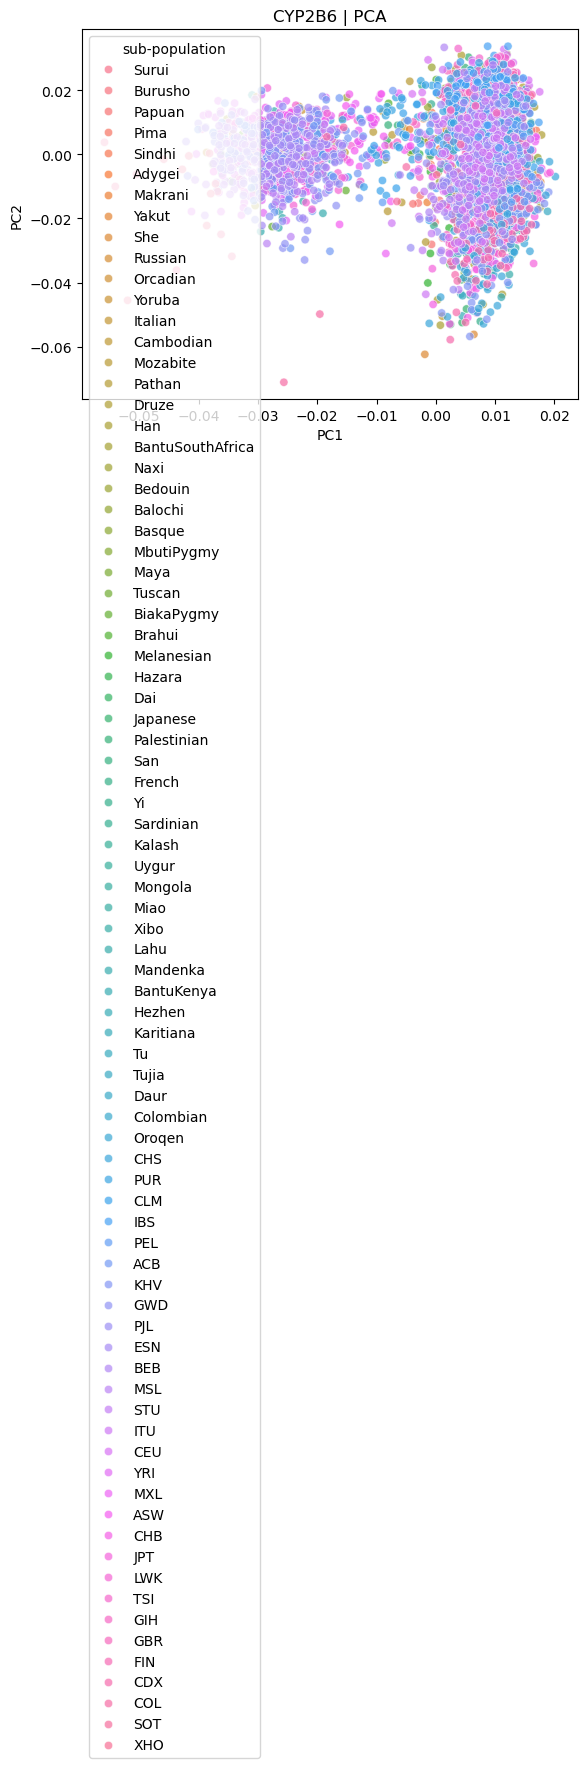

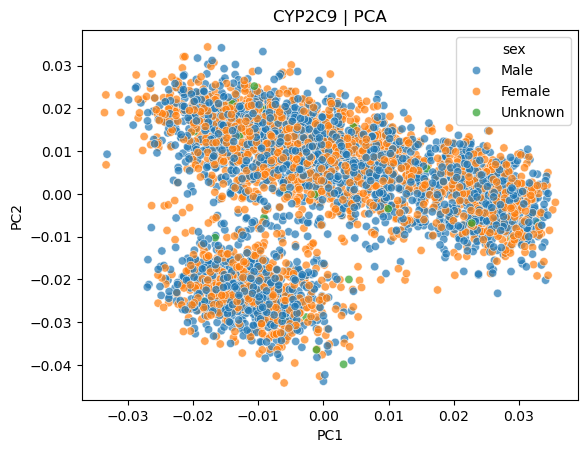

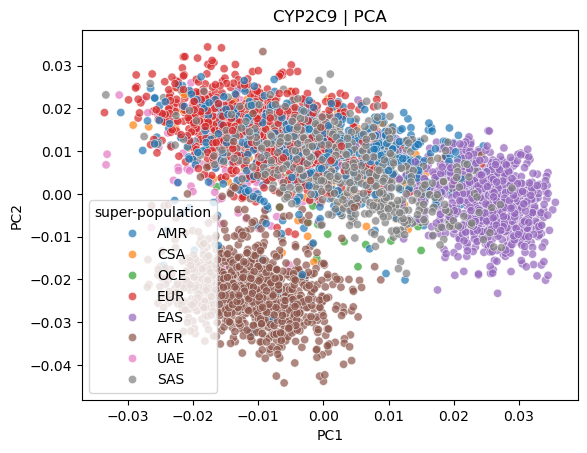

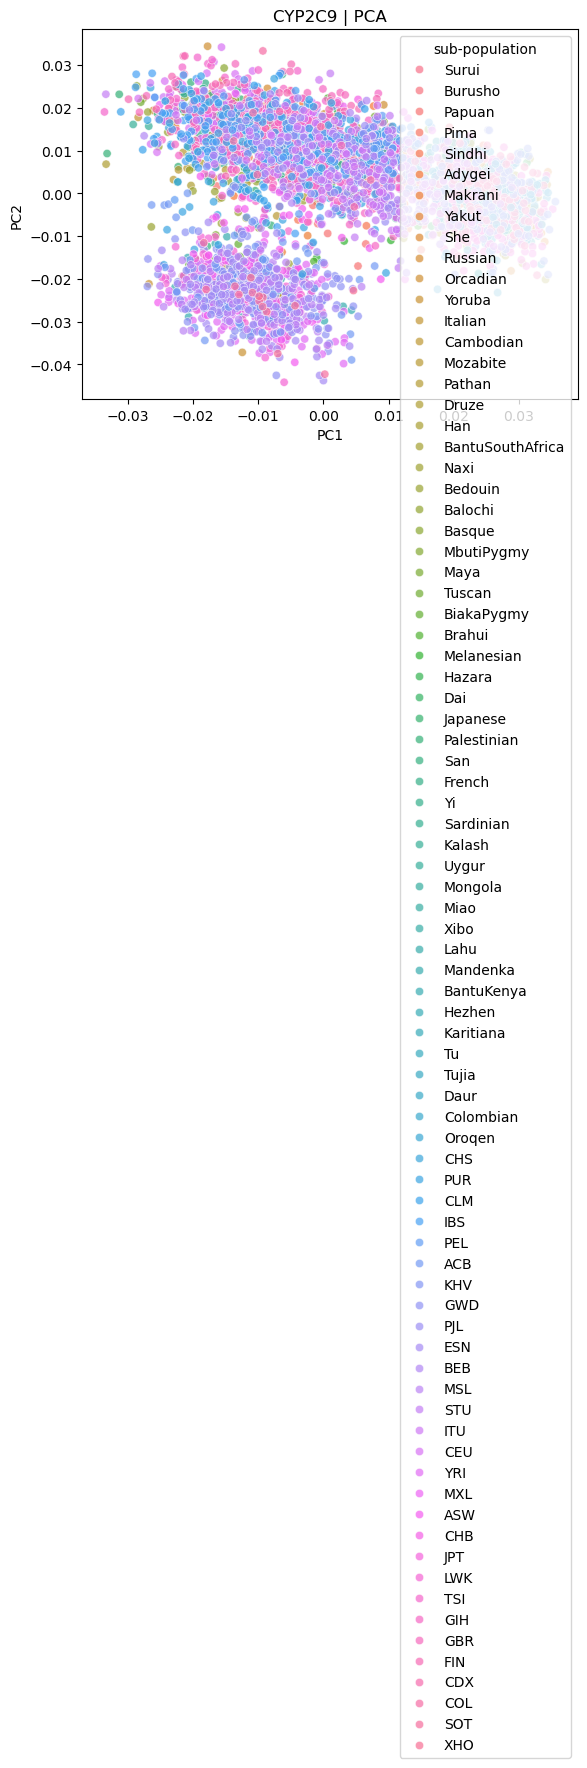

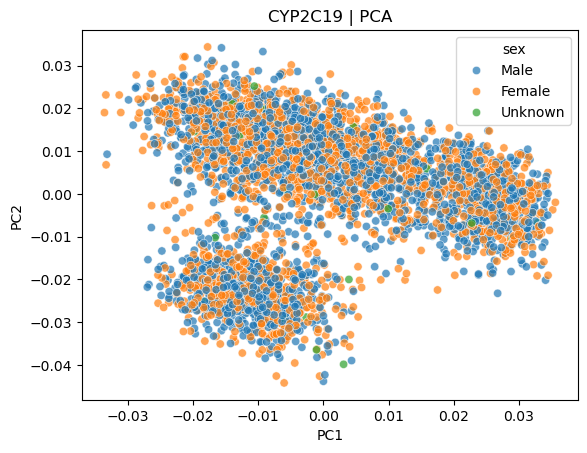

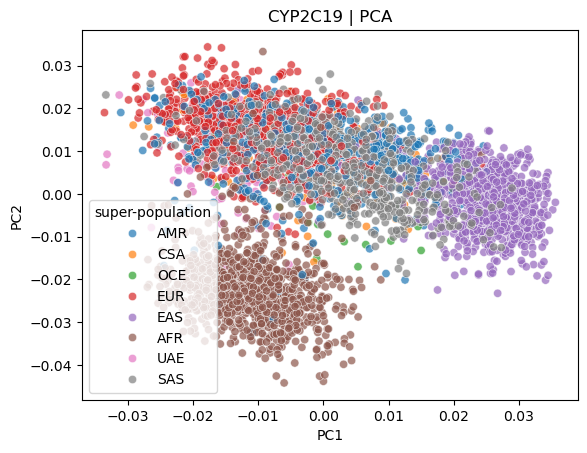

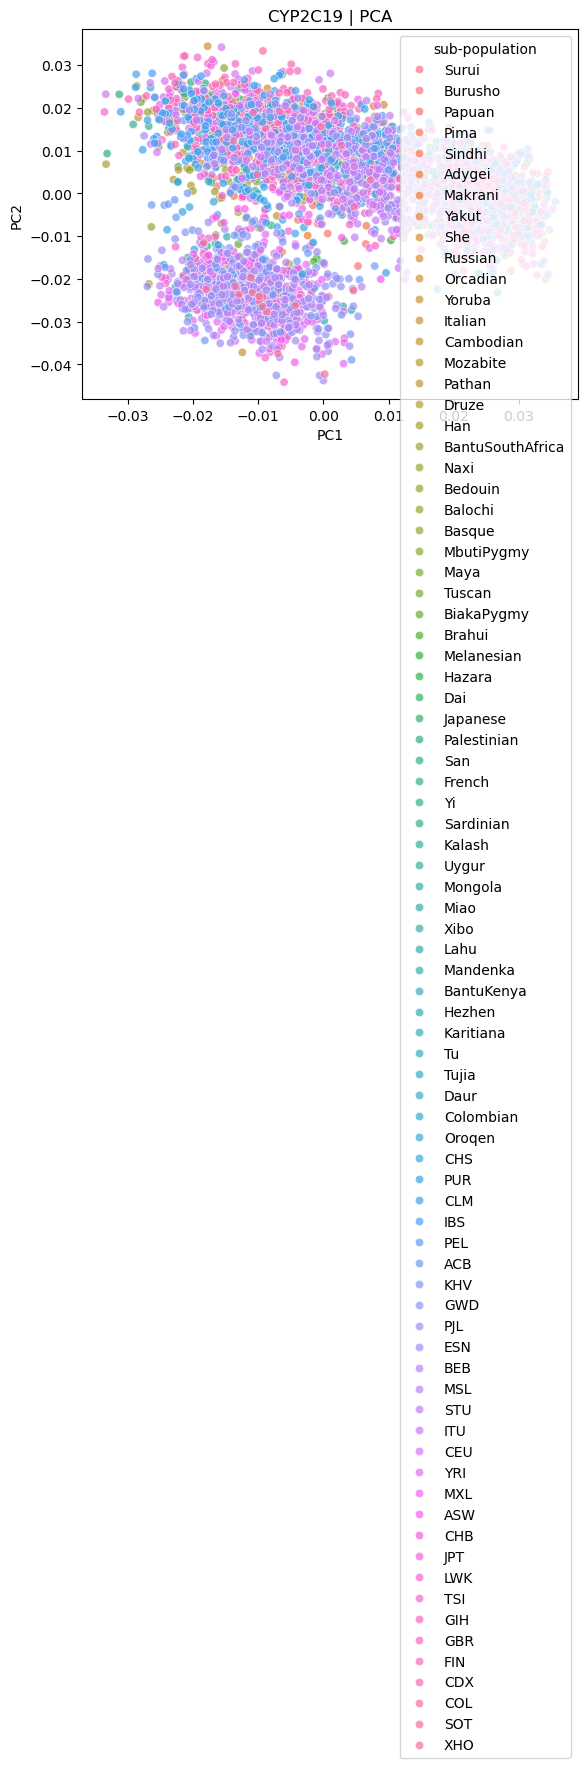

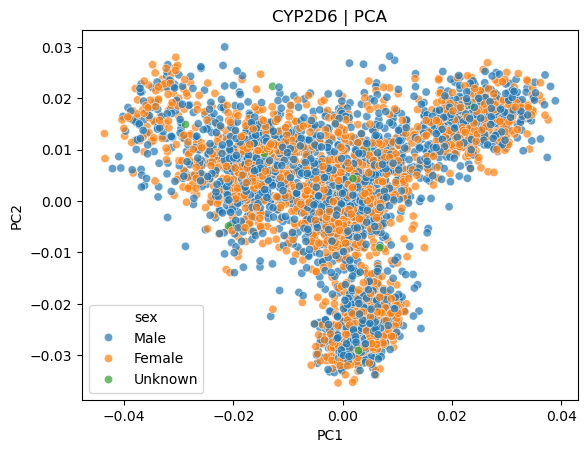

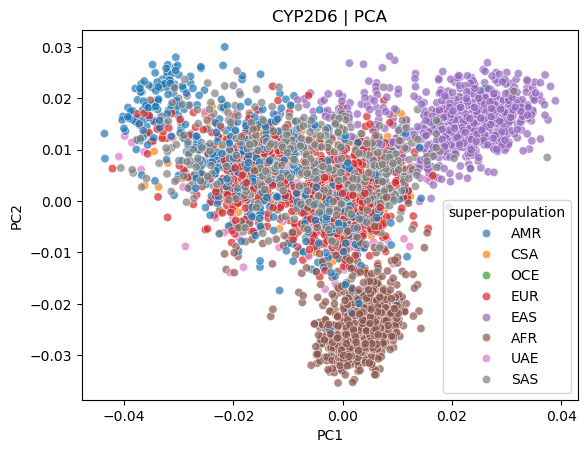

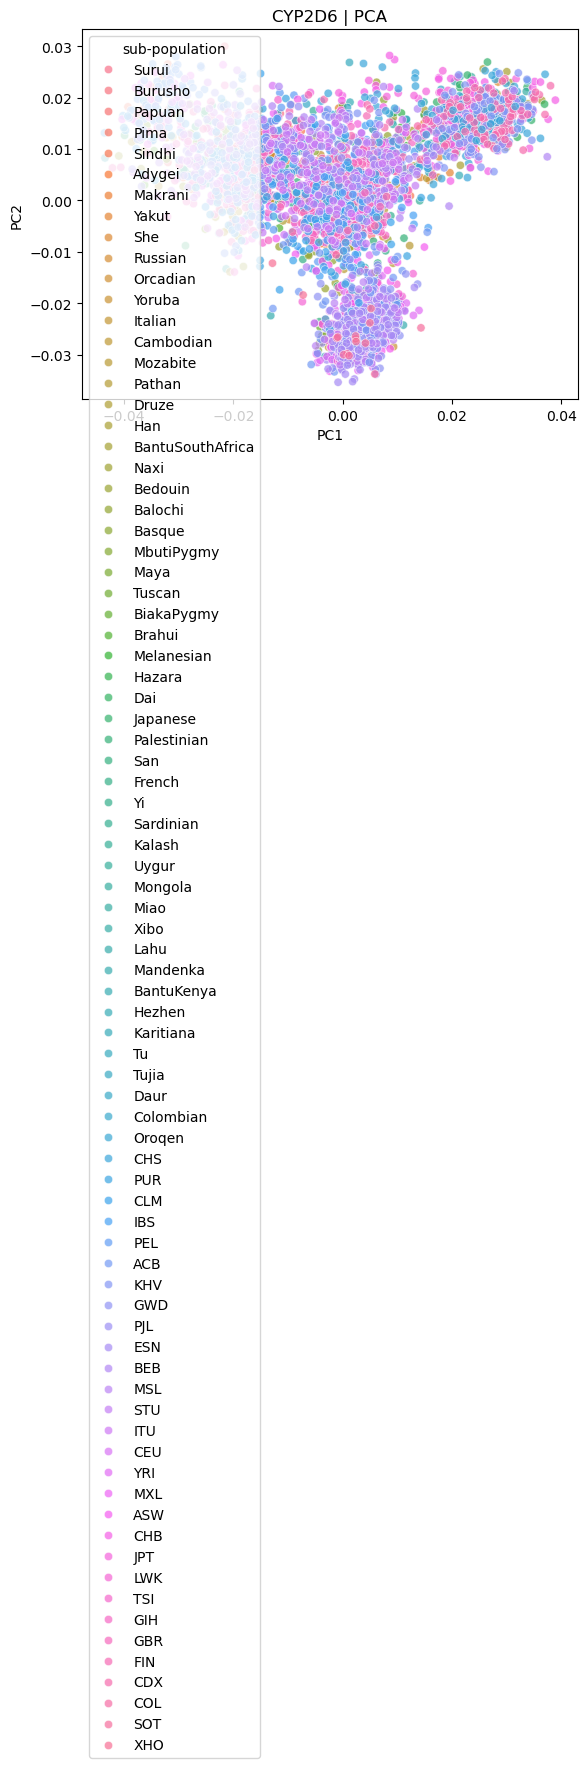

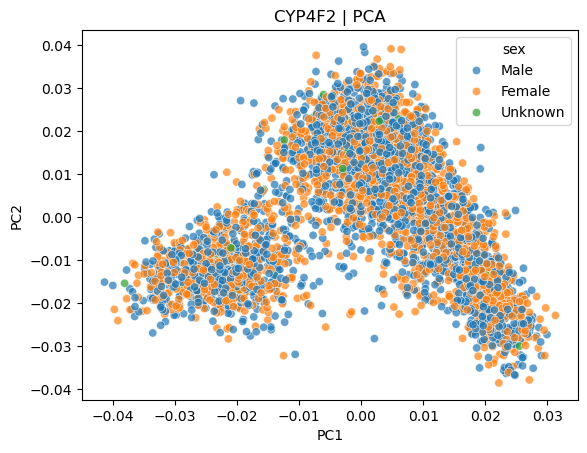

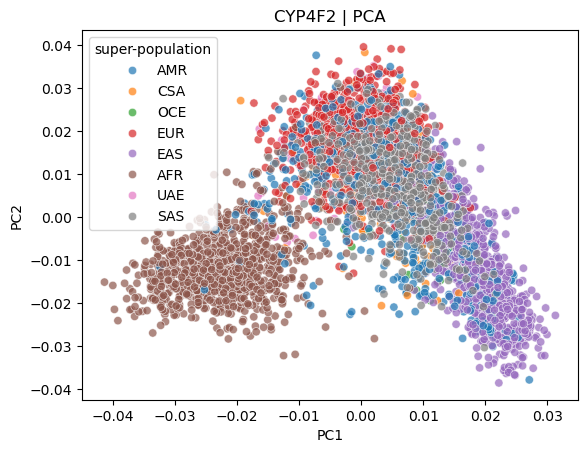

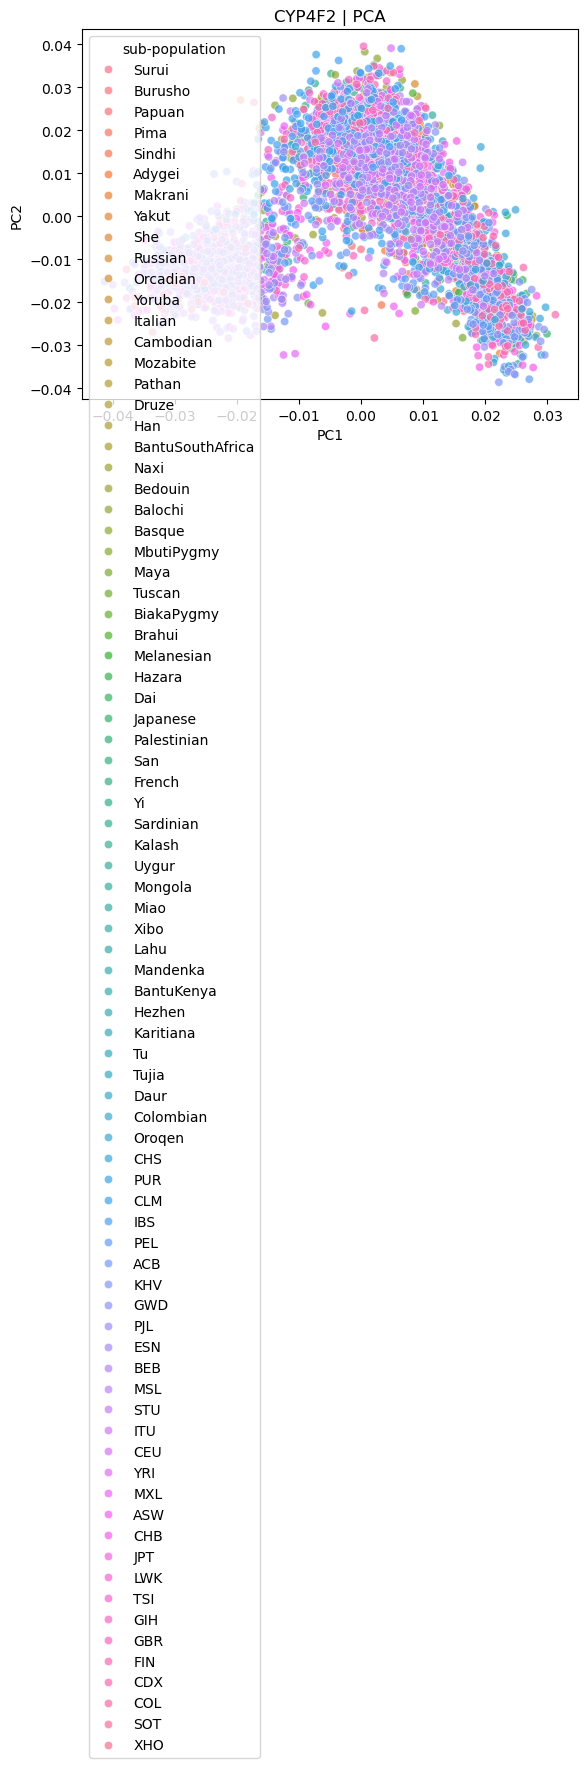

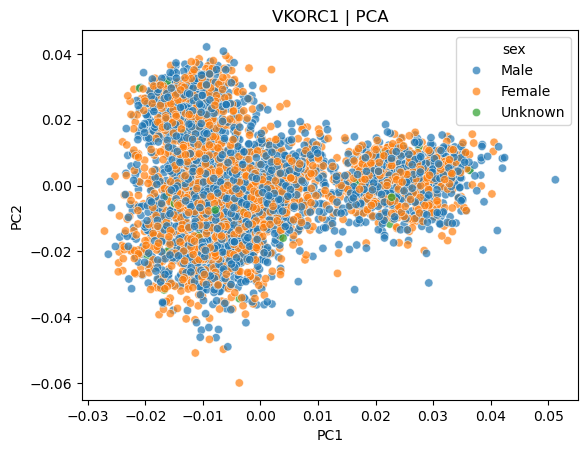

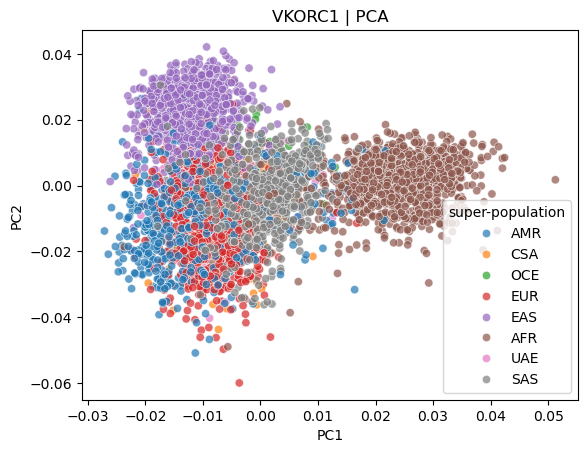

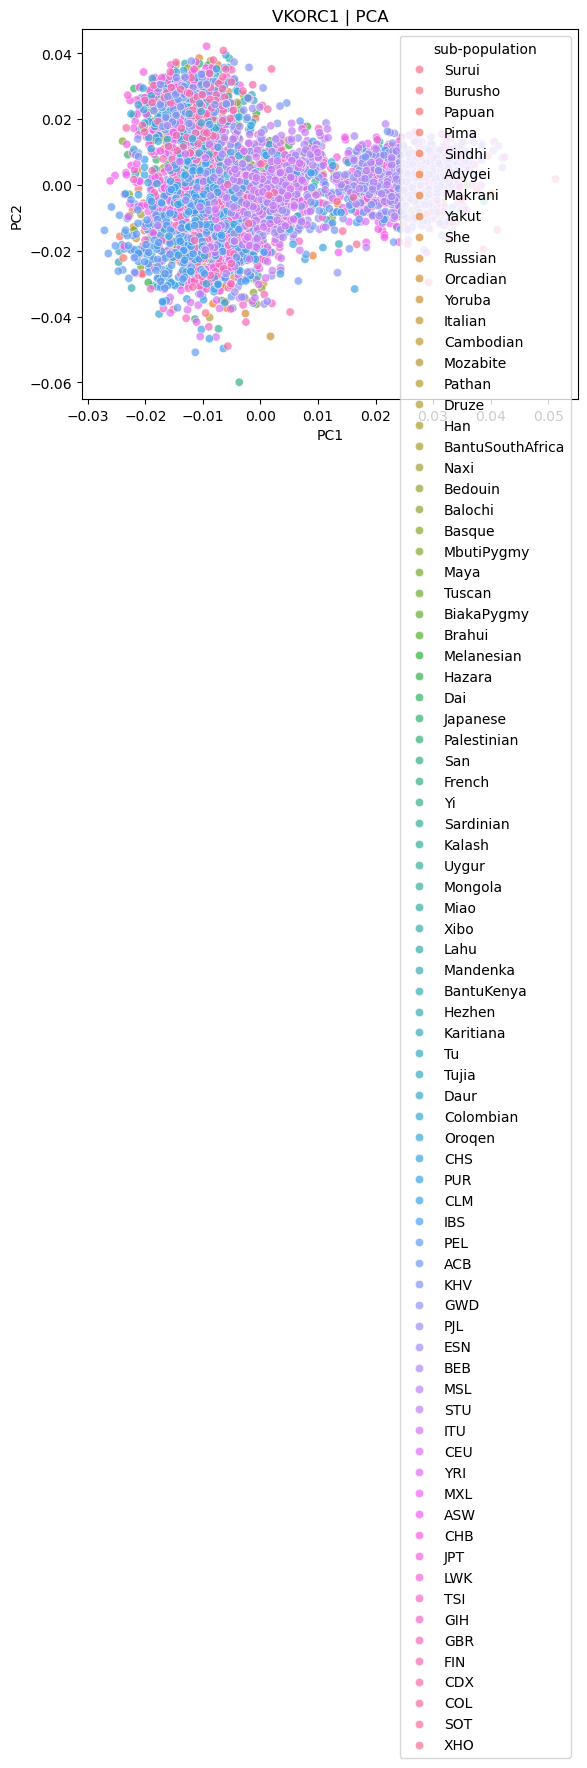

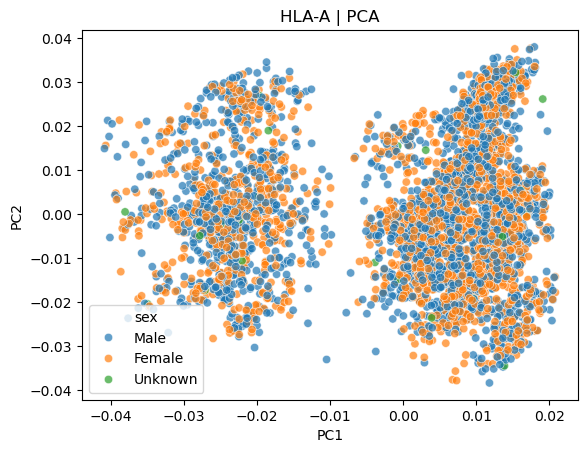

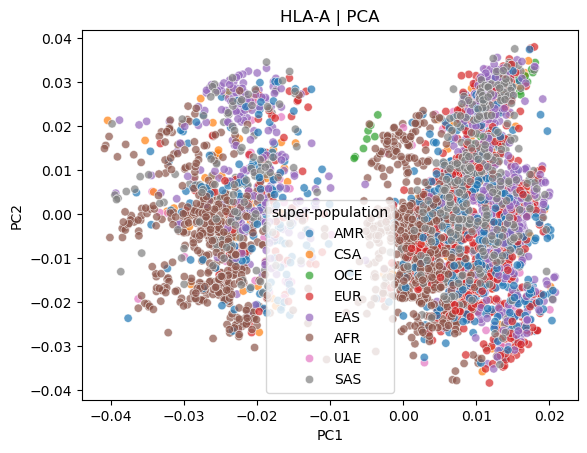

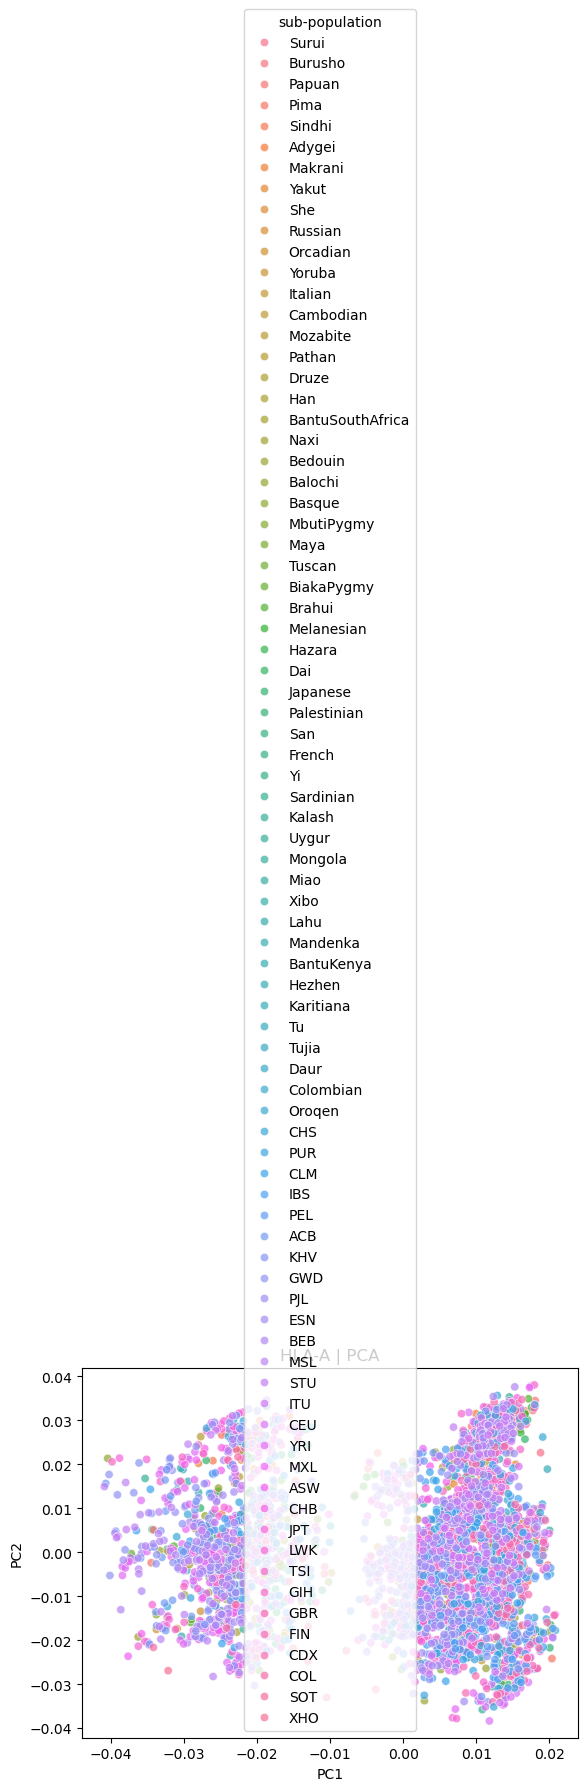

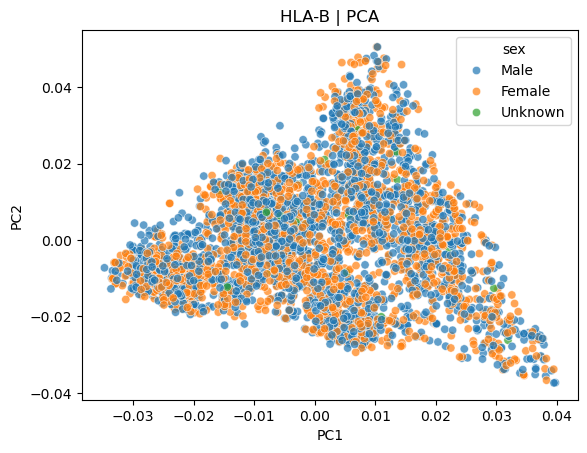

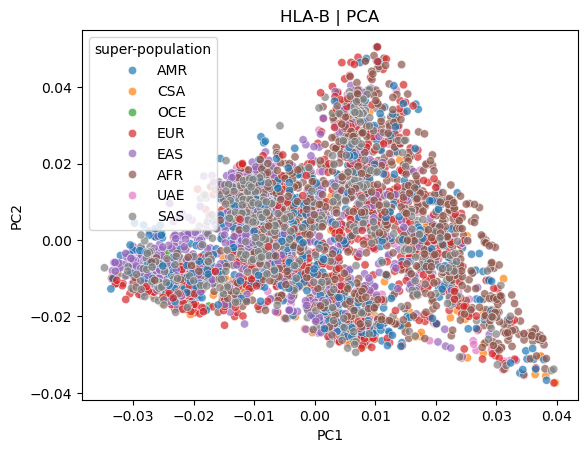

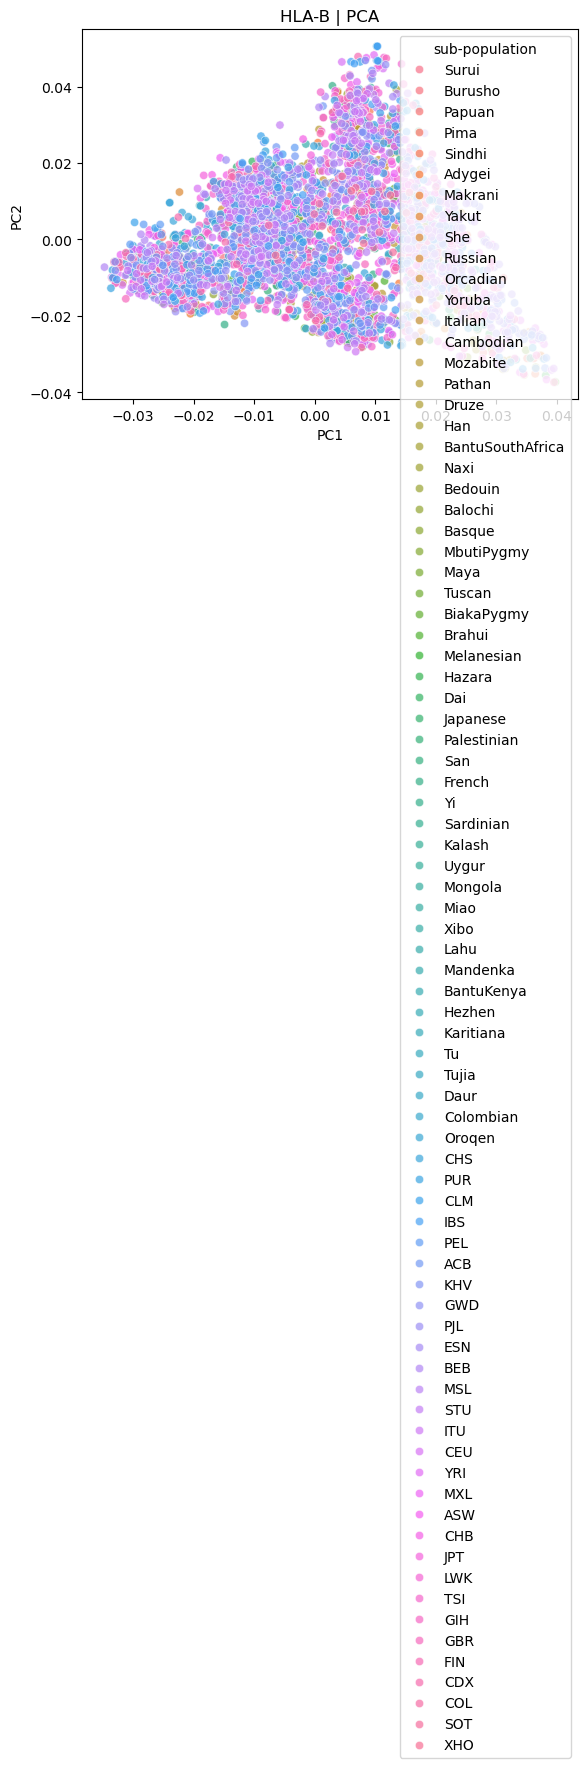

In [32]:
FIGURE = dict()

for gene in LOCATIONS["location_name"].unique().tolist():
    FIGURE[gene] = dict()
    for cluster in ["sex", "super-population", "sub-population"]:
        FIGURE[gene][cluster] = dict()
        FIGURE[gene][cluster] = scatterplot(DATA[gene]["eigenvectors"], x="PC1", y="PC2", hue=cluster, alpha=0.7)

        FIGURE[gene][cluster].set_title(f"{gene} | PCA")

        plt.show()

## Export Figures

In [33]:
Path(join(path, "Graphs", "07")).mkdir(exist_ok=True, parents=True)

In [34]:
for gene in LOCATIONS["location_name"].unique().tolist():
    for cluster in ["sex", "super-population", "sub-population"]:
        Path(join(path, "Graphs", "07", cluster)).mkdir(exist_ok=True)
        FIGURE[gene][cluster].figure.savefig(
            join(path, "Graphs", "07", cluster, f"PCA {gene}.jpeg"),
            format="jpeg",
            bbox_inches="tight",
        )